<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/9-3%20LSTM%EA%B3%BC%20GRU%20%EC%85%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM과 GRU 셀

## 데이터 정리 및 모델 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, Dropout, LSTM, GRU
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [4]:
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

## LSTM 신경망 훈련하기

In [5]:
model = Sequential()
model.add(Embedding(500, 16, input_length=100))
model.add(LSTM(8))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [7]:
rmsprop = RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
checkpoint_cb = ModelCheckpoint('best_lstm_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

In [9]:
history = model.fit(train_seq, train_target,
                    epochs=100, batch_size=64, verbose=1,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 14s 23ms/step - loss: 0.6926 - accuracy: 0.5487 - val_loss: 0.6920 - val_accuracy: 0.5590
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6906 - accuracy: 0.6065 - val_loss: 0.6892 - val_accuracy: 0.6160
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6854 - accuracy: 0.6378 - val_loss: 0.6812 - val_accuracy: 0.6534
Epoch 4/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6685 - accuracy: 0.6591 - val_loss: 0.6509 - val_accuracy: 0.6670
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6106 - accuracy: 0.7072 - val_loss: 0.5888 - val_accuracy: 0.7360
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5700 - accuracy: 0.7413 - val_loss: 0.5617 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5446 - accuracy: 0.7566 - val_loss: 0.5394 - val_accuracy

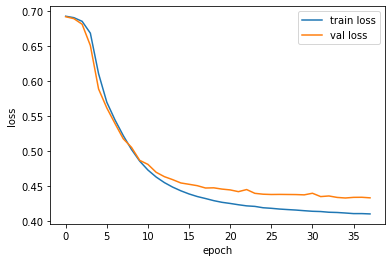

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

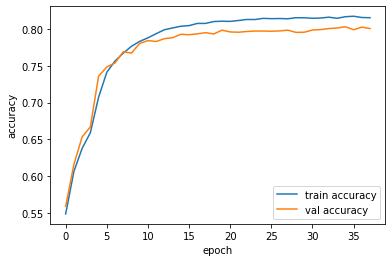

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

## 순환 층에 드롭아웃 적용하기

In [12]:
model2 = Sequential()
model2.add(Embedding(500, 16, input_length=100))
model2.add(LSTM(8, dropout=0.3))
model2.add(Dense(1, activation='sigmoid'))

In [13]:
rmsprop = RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
checkpoint_cb = ModelCheckpoint('best_lstm_dropout_model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

In [15]:
history2 = model2.fit(train_seq, train_target,
                    epochs=100, batch_size=64, verbose=1,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 22ms/step - loss: 0.6927 - accuracy: 0.5250 - val_loss: 0.6923 - val_accuracy: 0.5488
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6916 - accuracy: 0.5741 - val_loss: 0.6909 - val_accuracy: 0.5930
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6893 - accuracy: 0.6068 - val_loss: 0.6880 - val_accuracy: 0.6180
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6846 - accuracy: 0.6353 - val_loss: 0.6816 - val_accuracy: 0.6288
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6712 - accuracy: 0.6444 - val_loss: 0.6581 - val_accuracy: 0.6586
Epoch 6/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6200 - accuracy: 0.7053 - val_loss: 0.5945 - val_accuracy: 0.7328
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.5789 - accuracy: 0.7386 - val_loss: 0.5674 - val_accuracy

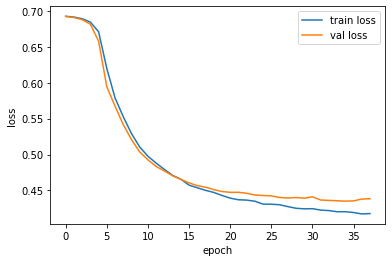

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

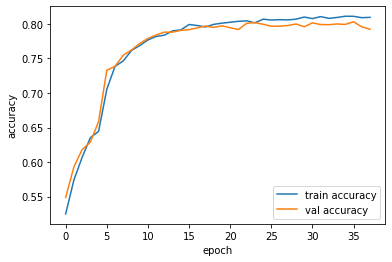

In [17]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [18]:
train_seq.nbytes, train_input.nbytes 

(8000000, 160000)

## 2개의 층을 연결하기

In [19]:
model3 = Sequential()
model3.add(Embedding(500, 16, input_length=100))
model3.add(LSTM(8, dropout=0.3, return_sequences=True)) # 다 층일 경우, return_sequences 를 정의해 주어야 함.
model3.add(LSTM(8, dropout=0.3))
model3.add(Dense(1, activation='sigmoid'))

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


## 2개의 층을 연결하기

In [21]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [22]:
rmsprop = RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint('best-2rnn-model.h5', save_best_only=True)
early_stopping_cb = EarlyStopping(patience=3, restore_best_weights=True)

history3 = model3.fit(train_seq, train_target, epochs=100, batch_size=64, 
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 45ms/step - loss: 0.6926 - accuracy: 0.5271 - val_loss: 0.6917 - val_accuracy: 0.5762
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6888 - accuracy: 0.6051 - val_loss: 0.6846 - val_accuracy: 0.6168
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6612 - accuracy: 0.6597 - val_loss: 0.6167 - val_accuracy: 0.6908
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5723 - accuracy: 0.7139 - val_loss: 0.5460 - val_accuracy: 0.7364
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5337 - accuracy: 0.7427 - val_loss: 0.5176 - val_accuracy: 0.7506
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5125 - accuracy: 0.7544 - val_loss: 0.4988 - val_accuracy: 0.7648
Epoch 7/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4963 - accuracy: 0.7638 - val_loss: 0.4843 - val_ac

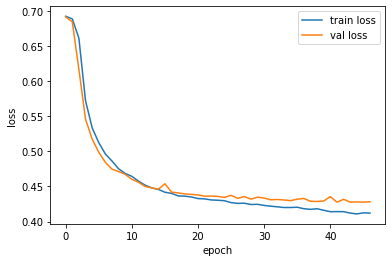

In [23]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

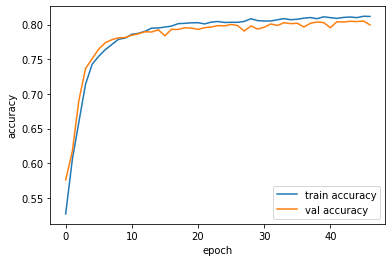

In [24]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [25]:
test_seq = pad_sequences(test_input, maxlen=100)
model3.predict(test_seq)

array([[0.3959093 ],
       [0.33369282],
       [0.3478585 ],
       ...,
       [0.03961051],
       [0.1024263 ],
       [0.6658033 ]], dtype=float32)

In [26]:
model3.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 16ms/step - loss: 0.4231 - accuracy: 0.8034


[0.4231336712837219, 0.8034399747848511]

## GRU 신경망 훈련하기

In [27]:
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history4 = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 23ms/step - loss: 0.6923 - accuracy: 0.5343 - val_loss: 0.6916 - val_accuracy: 0.5386
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6901 - accuracy: 0.5685 - val_loss: 0.6893 - val_accuracy: 0.5674
Epoch 3/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6868 - accuracy: 0.5920 - val_loss: 0.6856 - val_accuracy: 0.5872
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6817 - accuracy: 0.6069 - val_loss: 0.6799 - val_accuracy: 0.6026
Epoch 5/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6740 - accuracy: 0.6180 - val_loss: 0.6720 - val_accuracy: 0.6092
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6633 - accuracy: 0.6352 - val_loss: 0.6608 - val_accuracy: 0.6196
Epoch 7/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6483 - accuracy: 0.6453 - val_loss: 0.6452 - val_accuracy

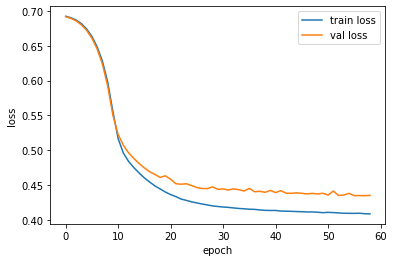

In [29]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

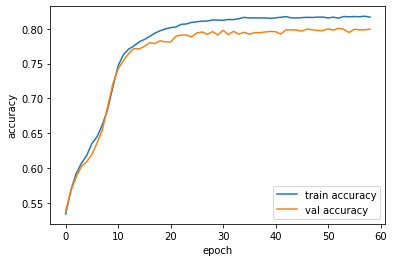

In [30]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [31]:
model3.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 16ms/step - loss: 0.4231 - accuracy: 0.8034


[0.4231336712837219, 0.8034399747848511]

## 마무리

In [32]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.h5')

rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 13s 16ms/step - loss: 0.4231 - accuracy: 0.8034


[0.4231336712837219, 0.8034399747848511]

In [33]:
early_stopping_cb.best_epoch, early_stopping_cb.stopped_epoch

(55, 58)